In [1]:
#multiple regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('fivethirtyeight')

In [2]:
dow = pd.read_csv('data/dow_zombie_stats')
dow.drop(columns='Unnamed: 0',inplace=True)

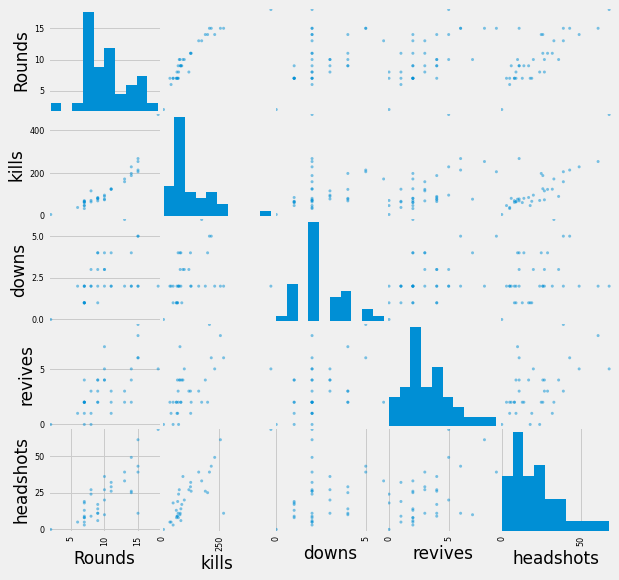

In [3]:
pd.plotting.scatter_matrix(dow,figsize  = [9, 9]);
plt.show()
#linear potential: def rounds, maybe revives and headshots

In [4]:
dow.corr()

,Rounds,kills,downs,revives,headshots
Rounds,1.000000,0.906524,0.487201,0.666663,0.798977
kills,0.906524,1.000000,0.265874,0.562048,0.806952
downs,0.487201,0.265874,1.000000,0.392348,0.281863
revives,0.666663,0.562048,0.392348,1.000000,0.499116
headshots,0.798977,0.806952,0.281863,0.499116,1.000000


In [5]:
#correlations with kills: Rounds,headshots
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=dow.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [6]:
df[(df.cc>.75) & (df.cc <1)]
#highly correlated pairs
#might want to remove headshots bc collinearity

,cc
pairs,
"(Rounds, kills)",0.906524
"(headshots, kills)",0.806952
"(headshots, Rounds)",0.798977


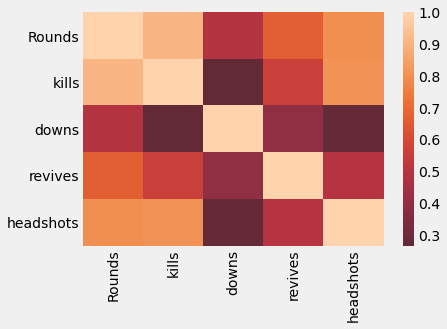

In [7]:
#visualize  with a heatmap
import seaborn as sns
sns.heatmap(dow.corr(), center=0);

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
predictors = dow.drop('kills', axis=1)

formula = 'kills ~ Rounds+headshots'
model = ols(formula=formula, data=dow).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kills   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     84.43
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           1.72e-13
Time:                        11:25:20   Log-Likelihood:                -174.91
No. Observations:                  35   AIC:                             355.8
Df Residuals:                      32   BIC:                             360.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -100.8570     22.376     -4.507      0.000    -146.435     -55.279
Rounds        19.1709      3.107      6.170      0.000      12.841      25.500
headshots      1.2751      0.655      1.948      0.060      -0.058       2.608
==============================================================================
Omnibus:                       29.876   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.179
Skew:                           2.014   Prob(JB):                     1.57e-15
Kurtosis:                       8.524   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#this is better than just Roundd or headshots

In [14]:
#what if we add another predictor like revives?
predictors = dow.drop('kills', axis=1)

formula = 'kills ~ Rounds+headshots+revives'
model = ols(formula=formula, data=dow).fit()

model.summary()
#Its not noticeably better

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kills   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     55.42
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           1.47e-12
Time:                        11:39:25   Log-Likelihood:                -174.67
No. Observations:                  35   AIC:                             357.3
Df Residuals:                      31   BIC:                             363.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -104.2837     23.177     -4.499      0.000    -151.554     -57.013
Rounds        20.4007      3.655      5.581      0.000      12.945      27.856
headshots      1.2426      0.662      1.876      0.070      -0.108       2.593
revives       -2.5913      3.959     -0.654      0.518     -10.667       5.484
==============================================================================
Omnibus:                       28.420   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.685
Skew:                           1.957   Prob(JB):                     1.10e-13
Kurtosis:                       8.060   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

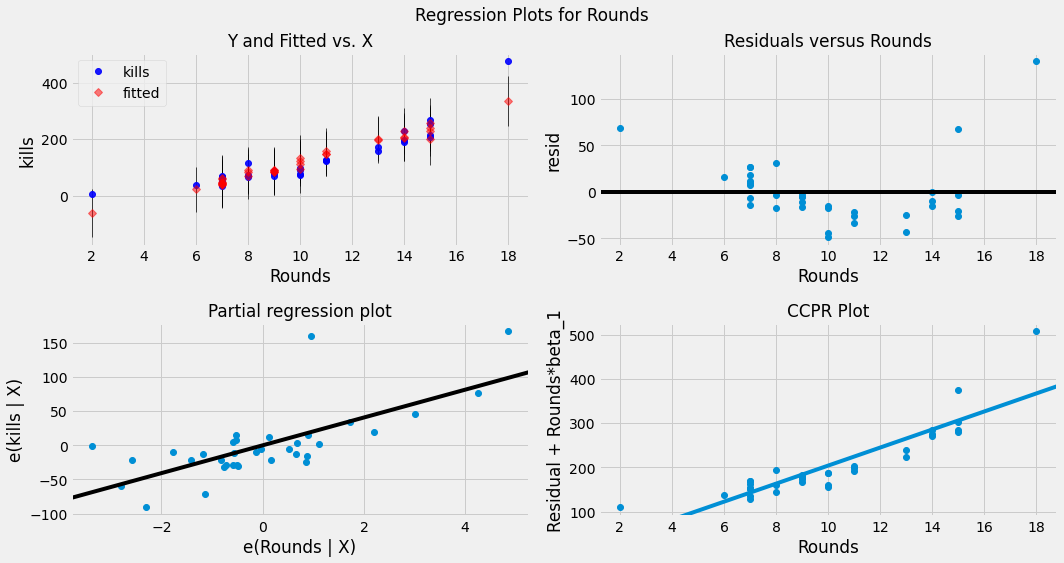

In [15]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Rounds", fig=fig)
plt.show()